# ELM com Escalonamento

Utilizaremos o algoritmo de ELM desenvolvido no arquivo 3, e aplicaremos escalonamento.

In [1]:
%matplotlib inline
import numpy as np
#Valores de X
heatflux = np.array([[271.8,	783.35,	33.53,	40.55,	16.66,	13.2],[264,	748.45,	36.5,	36.19,	16.46,	14.11],[238.8,	684.45,	34.66,	37.31,	17.66,	15.68],[230.7,	827.8,	33.13,	32.52,	17.5,	10.53],[251.6,	860.45,	35.75,	33.71,	16.4,	11],[257.9,	875.15,34.46,	34.14,	16.28,	11.31],[263.9,	909.45,	34.6,	34.85,	16.06,	11.96],[266.5,	905.55,	35.38,	35.89,	15.93,	12.58],[229.1,	756,	35.85,	33.53,	16.6,	10.66],[239.3,	769.35,	35.68,	33.79,	16.41,	10.85],[258,	793.5,	35.35,	34.72,	16.17,	11.41],[257.6,	801.65,	35.04,	35.22,	15.92,	11.91],[267.3,	819.65,	34.07,	36.5,	16.04,	12.85],[267,	808.55,	32.2,	37.6,	16.19,	13.58],[259.6,	774.95,	34.32,	37.89,	16.62,	14.21],[240.4,	711.85,	31.08,	37.71,	17.37,	15.56],[227.2,	694.85,	35.73,	37,	18.12,	15.83],[196,	638.1,	34.11,	36.76,	18.53,	16.41],[278.7,	774.55,	34.79,	34.62,	15.54,	13.1],[272.3,	757.9,	35.77,	35.4,	15.7,	13.63],[267.4,	753.35,	36.44,	35.96,	16.45,	14.51],[254.5,	704.7,	37.82,	36.26,	17.62,	15.38],[224.7,	666.8,	35.07,	36.34,	18.12,	16.1],[181.5,	568.55,	35.26,	35.9,	19.05,	16.73],[227.5,	653.1,	35.56,	31.84,	16.51,	10.58],[253.6,	704.05,	35.73,	33.16,	16.02,	11.28],[263,	709.6,	36.46,	33.83,	15.89,	11.91],[265.8,	726.9,	36.26,	34.89,	15.83,	12.65],[263.8,	697.15,	37.2,	36.27,	16.71,	14.06]])
heatflux

array([[ 271.8 ,  783.35,   33.53,   40.55,   16.66,   13.2 ],
       [ 264.  ,  748.45,   36.5 ,   36.19,   16.46,   14.11],
       [ 238.8 ,  684.45,   34.66,   37.31,   17.66,   15.68],
       [ 230.7 ,  827.8 ,   33.13,   32.52,   17.5 ,   10.53],
       [ 251.6 ,  860.45,   35.75,   33.71,   16.4 ,   11.  ],
       [ 257.9 ,  875.15,   34.46,   34.14,   16.28,   11.31],
       [ 263.9 ,  909.45,   34.6 ,   34.85,   16.06,   11.96],
       [ 266.5 ,  905.55,   35.38,   35.89,   15.93,   12.58],
       [ 229.1 ,  756.  ,   35.85,   33.53,   16.6 ,   10.66],
       [ 239.3 ,  769.35,   35.68,   33.79,   16.41,   10.85],
       [ 258.  ,  793.5 ,   35.35,   34.72,   16.17,   11.41],
       [ 257.6 ,  801.65,   35.04,   35.22,   15.92,   11.91],
       [ 267.3 ,  819.65,   34.07,   36.5 ,   16.04,   12.85],
       [ 267.  ,  808.55,   32.2 ,   37.6 ,   16.19,   13.58],
       [ 259.6 ,  774.95,   34.32,   37.89,   16.62,   14.21],
       [ 240.4 ,  711.85,   31.08,   37.71,   17.37,   

In [2]:
#Utilizaremos uma função para treinamento da ELM de acordo com o explicado no documento 3
def treinaelm(X,D,P):
    U = np.random.randn(P, 2) #Distribuição Gaussiana
    Xa = np.c_[X, np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    V = np.transpose(np.linalg.pinv(Ha)@D)
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)  #EQM da rede
    return (U,V,Y,E,EQM)

In [3]:
#Utilizaremos uma função para cálculo do erro da ELM de acordo com o explicado no documento 3
def erroelm(X,D,U,V):
    Xa = np.c_[X,np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)
    return (Y,E,EQM)

In [4]:
#Iremos usar o valor da coluna 3 que corresponde a insolação
X = heatflux[:,3]
X

array([ 40.55,  36.19,  37.31,  32.52,  33.71,  34.14,  34.85,  35.89,
        33.53,  33.79,  34.72,  35.22,  36.5 ,  37.6 ,  37.89,  37.71,
        37.  ,  36.76,  34.62,  35.4 ,  35.96,  36.26,  36.34,  35.9 ,
        31.84,  33.16,  33.83,  34.89,  36.27])

In [5]:
#A coluna que representa as saídas desejadas são
D = heatflux[:,1]
D

array([ 783.35,  748.45,  684.45,  827.8 ,  860.45,  875.15,  909.45,
        905.55,  756.  ,  769.35,  793.5 ,  801.65,  819.65,  808.55,
        774.95,  711.85,  694.85,  638.1 ,  774.55,  757.9 ,  753.35,
        704.7 ,  666.8 ,  568.55,  653.1 ,  704.05,  709.6 ,  726.9 ,
        697.15])

In [6]:
#Criando array de permutação para permutar as linhas de X e D
ind = np.random.permutation(X.shape[0])
ind

array([ 5,  1, 23, 28,  8, 13,  6, 22, 14, 17, 21, 11, 10,  9, 12, 15,  0,
       25, 16, 26,  3, 18,  2, 20,  7, 27, 24, 19,  4])

In [7]:
#Permutando as linhas de X
X = X[ind]
X

array([ 34.14,  36.19,  35.9 ,  36.27,  33.53,  37.6 ,  34.85,  36.34,
        37.89,  36.76,  36.26,  35.22,  34.72,  33.79,  36.5 ,  37.71,
        40.55,  33.16,  37.  ,  33.83,  32.52,  34.62,  37.31,  35.96,
        35.89,  34.89,  31.84,  35.4 ,  33.71])

In [8]:
#Permutando as linhas de D
D = D[ind]
D

array([ 875.15,  748.45,  568.55,  697.15,  756.  ,  808.55,  909.45,
        666.8 ,  774.95,  638.1 ,  704.7 ,  801.65,  793.5 ,  769.35,
        819.65,  711.85,  783.35,  704.05,  694.85,  709.6 ,  827.8 ,
        774.55,  684.45,  753.35,  905.55,  726.9 ,  653.1 ,  757.9 ,
        860.45])

In [9]:
#Quantidade de padrões selecionados para treinamento
numtr = int(np.ceil(X.shape[0]*0.7))
numtr

21

In [10]:
#Selecionando X de treinamento
Xtr = X[0:numtr]
Xtr

array([ 34.14,  36.19,  35.9 ,  36.27,  33.53,  37.6 ,  34.85,  36.34,
        37.89,  36.76,  36.26,  35.22,  34.72,  33.79,  36.5 ,  37.71,
        40.55,  33.16,  37.  ,  33.83,  32.52])

In [11]:
#Selecionando D de treinamento
Dtr = D[0:numtr]
Dtr

array([ 875.15,  748.45,  568.55,  697.15,  756.  ,  808.55,  909.45,
        666.8 ,  774.95,  638.1 ,  704.7 ,  801.65,  793.5 ,  769.35,
        819.65,  711.85,  783.35,  704.05,  694.85,  709.6 ,  827.8 ])

In [12]:
#Selecionando X e D para testes
Xtst = X[numtr:]
Dtst = D[numtr:]
display(Xtst,Dtst)

array([ 34.62,  37.31,  35.96,  35.89,  34.89,  31.84,  35.4 ,  33.71])

array([ 774.55,  684.45,  753.35,  905.55,  726.9 ,  653.1 ,  757.9 ,
        860.45])

In [13]:
#Selecionando os valores minimos e máximos de X e D
Xtrmax = np.max(Xtr)
Xtrmin = np.min(Xtr)
Dtrmax = np.max(Dtr)
Dtrmin = np.min(Dtr)
display(Xtrmax,Xtrmin,Dtrmax,Dtrmin)

40.549999999999997

32.520000000000003

909.45000000000005

568.54999999999995

In [14]:
#Definindo os intervalos de escalonamento para o conjunto de treinamento (intervalos)
Xtremin = -1;
Xtremax = 1;
Dtremin = -1
Dtremax = 1

In [15]:
#Escalonando X e D
Xtre = (Xtremax-Xtremin)*(Xtr-Xtrmin)/(Xtrmax-Xtrmin)+Xtremin
Dtre = (Dtremax-Dtremin)*(Dtr-Dtrmin)/(Dtrmax-Dtrmin)+Dtremin;
display(Xtre,Dtre)

array([-0.59651308, -0.08592777, -0.15815691, -0.06600249, -0.74844334,
        0.26525529, -0.41967621, -0.04856787,  0.33748443,  0.05603985,
       -0.06849315, -0.32752179, -0.45205479, -0.68368618, -0.00871731,
        0.29265255,  1.        , -0.84059776,  0.11581569, -0.67372354, -1.        ])

array([ 0.79876797,  0.05544148, -1.        , -0.24552655,  0.09973599,
        0.40803755,  1.        , -0.42358463,  0.21091229, -0.59196245,
       -0.20123203,  0.36755647,  0.31974186,  0.17805808,  0.47315928,
       -0.15928425,  0.26019361, -0.20504547, -0.25902024, -0.1724846 ,
        0.52097389])

In [16]:
#Quantidade de camadas ocultas
P = 5

In [17]:
#Treinando e calculando o erro
[U,V,Ytr,Etr,EQMtr] = treinaelm(Xtr,Dtr,P)
[Ytst,Etst,EQMt] = erroelm(Xtst,Dtst,U,V);

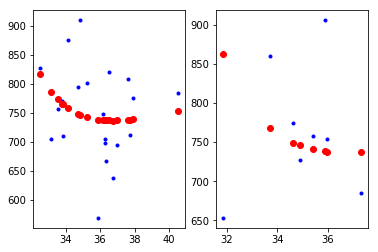

In [18]:
#Gráfico - dados sem escalonamento
import matplotlib.pyplot as plt
plt.subplot(1,2,1)
plt.plot(Xtr,Dtr,'b.',Xtr,Ytr,'ro')
plt.subplot(1,2,2)
plt.plot(Xtst,Dtst,'b.',Xtst,Ytst,'ro')
plt.show()

In [19]:
#Introduzindo escalonamento na representação dos resultados
[U,V,Ytre,Etre,EQMtre] = treinaelm(Xtre,Dtre,P)
Ytr= (Dtrmax-Dtrmin)*(Ytre-Dtremin)/(Dtremax-Dtremin)+Dtrmin
Ytr

array([ 796.37340099,  711.58028777,  742.19549957,  703.98732949,
        749.21051564,  739.26409072,  820.88377153,  697.83253572,
        799.85964202,  674.928205  ,  704.90607875,  806.30096256,
        821.34839791,  768.45734794,  685.92423243,  760.12827199,
        782.77001945,  736.98247545,  676.43254699,  771.72097092,
        812.41341714])

In [20]:
#Escalonando conjunto de teste
Xtst = (Xtremax-Xtremin)*(Xtst-Xtrmin)/(Xtrmax-Xtrmin)+Xtremin;
Xtst

array([-0.47696139,  0.19302615, -0.14321295, -0.16064757, -0.40971357,
       -1.16936488, -0.28268991, -0.70361146])

In [21]:
#Escalando Dtst para que os erros sejam calculados na escala correta
Dtst = (Dtremax-Dtremin)*(Dtst-Dtrmin)/(Dtrmax-Dtrmin)+Dtremin;
Dtst

array([ 0.20856556, -0.3200352 ,  0.08418891,  0.97711939, -0.07098856,
       -0.50396011,  0.11088296,  0.71252567])

In [22]:
#Calculando o erro da rede para o conjunto de teste
[Ytst,Etst,EQMtst] = erroelm(Xtst,Dtst,U,V);

In [23]:
#Escalonando Y
Ytst = (Dtrmax-Dtrmin)*(Ytst-Dtremin)/(Dtremax-Dtremin)+Dtrmin;
Ytst

array([  820.04404903,   697.95004338,   735.63747104,   743.29140081,
         820.24320208,  1131.13266262,   792.84787782,   762.07684119])

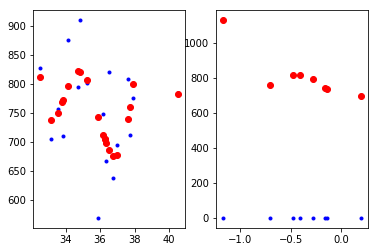

In [25]:
#Gráfico - dados com escalonamento
plt.subplot(1,2,1)
plt.plot(Xtr,Dtr,'b.',Xtr,Ytr,'ro')
plt.subplot(1,2,2)
plt.plot(Xtst,Dtst,'b.',Xtst,Ytst,'ro')
plt.show()

### Comparando com a regressão linear

In [29]:
#Função para ajuste linear
def ajustelinear(X,D):
    Xa = np.c_[X, np.ones(X.shape[0])]
    teta = np.linalg.pinv(Xa)@D
    Y = Xa@teta
    E = D-Y
    EQM = 1/X.shape[0]*(np.transpose(E)@E)
    return (Y,E,teta,EQM)

#Função para cálculo do erro do ajuste linear
def erroajustelinear(X,D,teta):
    Xa = np.c_[X, np.ones(X.shape[0])]
    Y = Xa@teta
    E= D - Y
    EQM = 1/X.shape[0]*(np.transpose(E)@E)
    return(Y,E,EQM)

In [30]:
#Calculando valores Ajuste Linear
[Ytr,Elintr,teta,EQMtr] = ajustelinear(Xtr,Dtr)
[Ytst,Elintst,EQMtst] = erroajustelinear(Xtst,Dtst,teta)

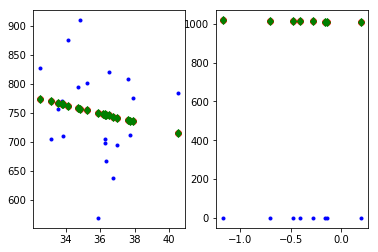

In [33]:
#Gráfico - Regressão linear
plt.subplot(1,2,1)
plt.plot(Xtr,Dtr,'b.',Xtr,Ytr,'ro',Xtr,Ytr,'gd')
plt.subplot(1,2,2)
plt.plot(Xtst,Dtst,'b.',Xtst,Ytst,'ro',Xtst,Ytst,'gd')
plt.show()

In [38]:
#Calculando EQM
vetEQMtr = np.c_[((np.transpose(Ytr-Dtr)@(Ytr-Dtr))/numtr), EQMtr]
vetEQMtst = np.c_[((np.transpose(Ytst-Dtst)@(Ytst-Dtst))/numtr), EQMtst]
display(vetEQMtr,vetEQMtst)

array([[ 5890.40932737,  5890.40932737]])

array([[  390859.09324934,  1026005.11977951]])